# Figures of section 4.1 of the SYGMA paper

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import sygma as s
import os
print s.__file__
%matplotlib inline

/Users/christian/ExtDrive64/NuGrid/NuPyCEE/sygma.pyc


In [2]:
%run read_wiersma_figures

In [1]:
## Parameter for standard best fit
iniZ_st=0.0126
imf_type_st='chabrier'
imf_bdys_st=[0.1,100] #based on paper p. 18 (and tests on p.19)
imf_yields_range_st=[0.8,100]  #0.8 based on calculations in paper p.19, paper uses 40Msun but then messses up plots, 100Msun good agreement.
sn1a_rate_st='exp' #based on paper .p. 23
exp_dtd_st=2e9  #based on paper p. 23
direct_norm_1a_st=0.02 #0.016 #better fit #0.02, #based on paper p. 23 (a parameter, see also p22)
dt_st=7e6
transitionmass_st=8 #6.8 #chosen to match the AGB and massive star  intersection.
yield_interp_st='wiersma' # means we correct for initial abundance as in wiersma (independent if yields are net yields or not.)
netyields_on_st=True #tells the code we actual use tabula.ted net yields. 
wiersmamod_st=True
table_st='yield_tables/agb_and_massive_stars_portinari98_marigo01.txt'
exclude_masses_st=[] #needs to be empty else 60Msun exlcuded!, cannot justify NOT to use 6,7Msun
sn1a_table_st='yield_tables/sn1a_t03.txt'
iniabu_table_st='yield_tables/iniabu/iniab_solar_Wiersma.ppn'
mgal_st = 1e4 #made to sygma.py defualt, #reasonable choice, high resolution of  mass of a particle ejected in a hydro simulation.

In [4]:
s0=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=imf_yields_range_st,
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

SYGMA run in progress..
   SYGMA run completed - Run time: 1.76s


## Fig. 9

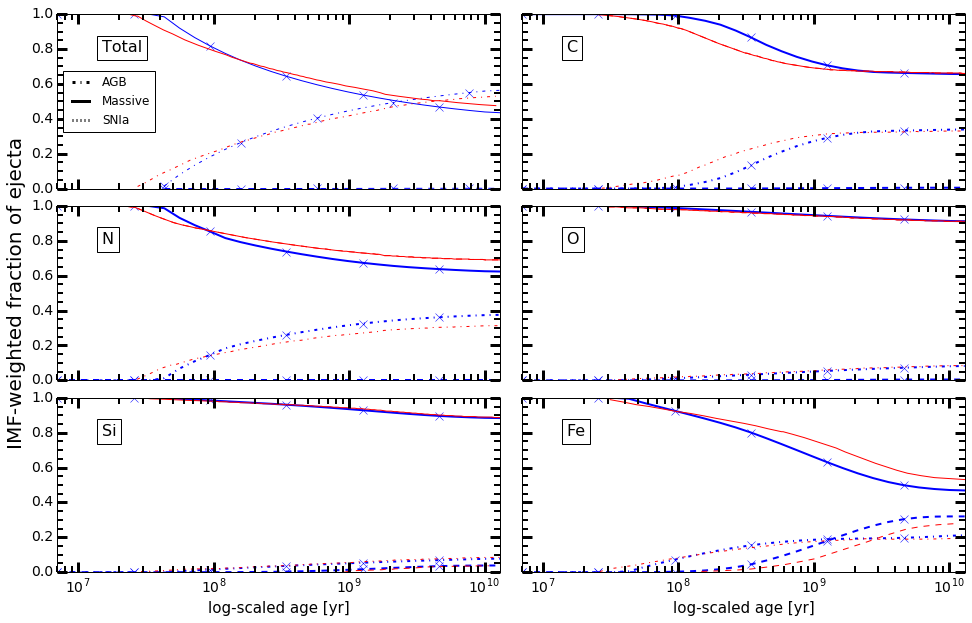

In [5]:
#%matplotlib nbagg
fign = 1
markevery=5
plt.close(2)
props = dict(boxstyle='square', facecolor='w', alpha=1)
f, axarr = plt.subplots(3, 2)
elements=['Total','C','N','O','Si','Fe']
for specie in elements:
        specieW=specie
        if specie=='Total':
            plt.sca(axarr[0, 0])
        if specie=='C':
            plt.sca(axarr[0, 1])
        elif specie=='N':
            plt.sca(axarr[1, 0])
        elif specie=='O':
            plt.sca(axarr[1, 1])
        elif specie=='Si':
            plt.sca(axarr[2, 0])
        elif specie=='Fe':
            plt.sca(axarr[2, 1])
        if not 'G-1' in elements and specie=='Total':
            specieW='tot'
            s0.plot_totmasses(fig=fign,source='agb',norm='current',color='b',
                  label='AGB, Z=1e-4',shape='-.',marker='x',log=False,markevery=markevery)
            s0.plot_totmasses(fig=1,source='massive',norm='current',color='b',
                  label='Massive, Z=1e-4',shape='-',marker='x',log=False,markevery=markevery)
            s0.plot_totmasses(fig=fign,source='sn1a',norm='current',color='b',
                  label='SN1a, Z=1e-4',shape='--',marker='x',log=False,markevery=markevery)   
            [x,y]=getW(fig=2,specie=specieW,source='agb',Z=0.02)
            plt.plot(x,y,color='r',linestyle='-.')    
            [x,y]=getW(fig=2,specie=specieW,source='massive',Z=0.02)
            plt.plot(x,y,color='r')
        else:
            if specie=='G-1':
                 specieW='tot'
            s0.plot_mass(fig=fign,specie=specie,source='agb',norm='current',color='b',
                     label=specie+' (AGB), Z=2e-2',shape='-.',marker='x',markevery=markevery)
            s0.plot_mass(fig=fign,specie=specie,source='massive',norm='current',color='b',
                     label=specie+' (massive), Z=2e-2',shape='-',marker='x',markevery=markevery)
            s0.plot_mass(fig=fign,specie=specie,source='sn1a',norm='current',color='b',
                     label=specie+' (SN1a), Z=2e-2',shape='--',marker='x',markevery=markevery)
            [x,y]=getW(fig=2,specie=specieW,source='agb',Z=0.02)
            plt.plot(x,y,color='r',linestyle='-.')    
            [x,y]=getW(fig=2,specie=specieW,source='massive',Z=0.02)
            plt.plot(x,y,color='r',linestyle='-')
            if not specie in ['N','C','O','G-1']:
                [x,y]=getW(fig=2,specie=specieW,source='sn1a',Z=0.02)
            plt.plot(x,y,color='r',linestyle='--')  

        ax=plt.gca()
        ax.text(0.1, 0.85, specie, transform=ax.transAxes, fontsize=16,verticalalignment='top', bbox=props)                
        ax.minorticks_on()
        plt.title('')
        plt.legend().set_visible(False)
        if (specie=='N'):
            ax.set_ylabel('IMF-weighted fraction of ejecta',size=20)
        elif not ( ((specie=='Total') or ( specie=='N')) or ( specie=='Si')):
            ax.get_yaxis().set_ticklabels([]) #set_visible(False)
            plt.ylabel('')
        else:
            plt.ylabel('')
        if specie=='Total':
            plt.plot([],[],marker='',linestyle='-.',color='k',label='AGB',linewidth=3)
            plt.plot([],[],marker='',linestyle='-',color='k',label='Massive',linewidth=3)
            plt.plot([],[],marker='',linestyle=':',color='k',label='SNIa',linewidth=3)            
            l2=ax.lines[-3:]
            plt.legend(l2,('AGB','Massive','SNIa'),loc=6,prop={'size': 12}).set_visible(True) 
        if specie in ['Total','C','N','O']:
            ax.get_xaxis().set_ticklabels([])
            plt.xlabel('')
        plt.ylim(0,1)
#general settings
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.05,left=0.05,right=0.95)
fig=plt.gcf()        
fig.set_size_inches(14,10,forward=True) #figsize=(6, 4)
#plt.tight_layout()
fig.savefig('wiersma_fig2.png', dpi=100) #save fgure

In [6]:
s1=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=imf_yields_range_st,
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=7.5,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

s2=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=imf_yields_range_st,
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=8.5,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)


SYGMA run in progress..
   SYGMA run completed - Run time: 3.16s
SYGMA run in progress..
   SYGMA run completed - Run time: 3.62s


## Fig. 10

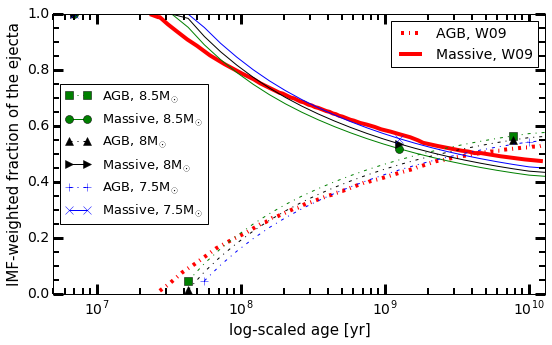

In [7]:
fign = fign + 1
figW=2
fig=plt.figure(fign)
ax=plt.gca()

Z=0.02
specie='tot'
[age,y_agb]=getW(fig=figW,specie=specie,source='agb',Z=Z)
l1,=ax.plot(age,y_agb,color='r',linestyle='-.',linewidth=4,label='AGB, W09')
[age,y_massive]=getW(fig=figW,specie=specie,source='massive',Z=Z)
l2,=ax.plot(age,y_massive,color='r',linestyle='-',linewidth=4,label='Massive, W09')
#ax.add_artist(leg)

leg=ax.legend(loc=1,fontsize=14)

s2.plot_totmasses(fig=fign,source='agb',color='g',shape='-.',norm='current',fsize=[10,6],marker='s')
s2.plot_totmasses(fig=fign,source='massive',color='g',shape='-',norm='current',fsize=[10,6],marker='o')  
s0.plot_totmasses(fig=fign,source='agb',color='k',shape='-.',norm='current',fsize=[10,6],marker='^')
s0.plot_totmasses(fig=fign,source='massive',color='k',shape='-',norm='current',fsize=[10,6],marker='>')      
s1.plot_totmasses(fig=fign,source='agb',color='b',shape='-.',norm='current',fsize=[10,6],marker='+')
s1.plot_totmasses(fig=fign,source='massive',color='b',shape='-',norm='current',fsize=[10,6],marker='x')    


plt.yscale('linear')
plt.ylabel('IMF-weighted fraction of the ejecta')
plt.title('')

ax.minorticks_on()
l2=ax.lines[2:]
ax.add_artist(leg)
ax.legend(l2,('AGB, '+str(s2.transitionmass)+'M$_{\odot}$','Massive, '+str(s2.transitionmass)+'M$_{\odot}$',
                       'AGB, '+str(s0.transitionmass)+'M$_{\odot}$','Massive, '+str(s0.transitionmass)+'M$_{\odot}$',
                        'AGB, '+str(s1.transitionmass)+'M$_{\odot}$','Massive, '+str(s1.transitionmass)+'M$_{\odot}$')
                       ,loc=6,prop={'size': 13})
 
ax.set_ylim(0,1)
fig.set_size_inches(8,5,forward=True)
plt.tight_layout()
plt.xlim(5e6,13e9)

fig.savefig('transition_mass_comparison.png', dpi=100) #save fgure

## Fig. 11

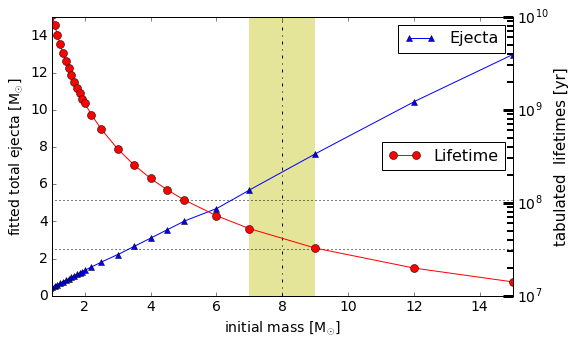

In [8]:
fign = fign + 1
plt.close(fign)
fig=plt.figure(fign)
mtotej=[]
mstars=s0.m_stars
plt.axvspan(7, 9, color='y', alpha=0.4, lw=0)
x=[]
#fit data
for m in np.arange(s0.imf_bdys[0],s0.imf_bdys[-1],0.001):
    x.append(s0.func_total_ejecta(m))
mstars=x
for k in range(len(mstars)):
    mtotej.append(s0.func_total_ejecta(mstars[k]))
plt.plot(mstars,mtotej,linestyle='-',color='b')#,marker='x',label='ejecta')
#masses from input grid
mstars=s0.m_stars
mtotej=[]
for k in range(len(mstars)):
    mtotej.append(s0.func_total_ejecta(mstars[k]))
plt.plot(mstars,mtotej,linestyle='',marker='^',markevery=1,color='b')#,marker='x',label='ejecta')
plt.plot([],[],linestyle='-',marker='^',color='b',label='Ejecta')#,marker='x',label='ejecta')

ax=plt.gca()
ax.legend(loc=1,fontsize=16)
ax.set_ylim(0,15)
ax.set_ylabel('fitted total ejecta [M$_{\odot}$]')
ax2=ax.twinx()
s0.plot_table_param(fig=fign,ax=ax2,quantity='Lifetime',iniZ=0.0127,table='yield_tables/agb_and_massive_stars_portinari98_marigo01.txt',label='Lifetime')
ax2.legend(loc=5,fontsize=16)
ax2.hlines(3.2e7,0,20,linestyle=':');plt.hlines(10.6e7,0,20,linestyle=':')
ax2.set_ylim(1e7,1e10)
ax2.vlines(8,1e7,1e10,linestyle='-.')
ax2.set_ylabel('tabulated  lifetimes [yr]')
plt.xlim(1,15)
fig.set_size_inches(8,5,forward=True)
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.05,left=0.1,right=0.9)
ax.set_xlabel('initial mass [M$_{\odot}$]')
fig.savefig('lifetime_vs_inim.png', dpi=100) #save fgure


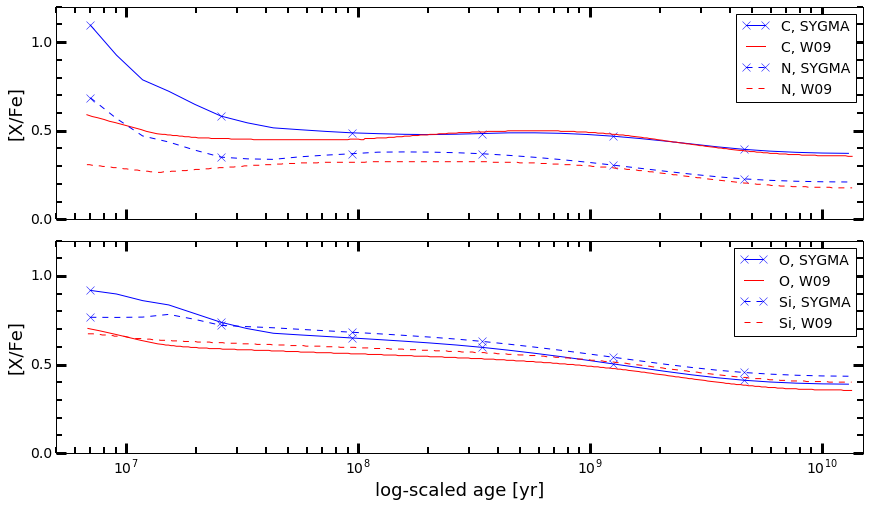

In [9]:
fign = fign + 1
markevery=5
f, axarr = plt.subplots(2, 1,num=fign)
fig=f
plt.sca(axarr[0])
yaxis='[C/Fe]'
s0.plot_spectro(fig=fign,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='-',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')
[x,y]=getW(fig=3,specie='[C/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r')
yaxis='[N/Fe]'
s0.plot_spectro(fig=fign,xaxis='age',yaxis=yaxis,source='all',label='N, solar',shape='--',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')
[x,y]=getW(fig=3,specie='[N/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r',linestyle='--')
plt.legend(loc=1)
plt.ylabel('[X/Fe]')
plt.xlim(5e6,1.5e10)
ax=plt.gca();ax.minorticks_on()
plt.yticks(np.arange(-0.5, 1.5, 0.5))
l2=ax.lines[-4:]; plt.legend(l2,('C, SYGMA','C, W09','N, SYGMA','N, W09'),loc=1,prop={'size': 14})
fig.set_size_inches(20,5)
ax.set_xlabel('')
plt.ylabel('[X/Fe]',size=18)
plt.ylim(0,1.2)
plt.sca(axarr[1])
yaxis='[O/Fe]'
s0.plot_spectro(fig=fign,xaxis='age',yaxis=yaxis,source='all',label='O, solar',shape='-',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')
[x,y]=getW(fig=3,specie='[O/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r',linestyle='-')
yaxis='[Si/Fe]'
s0.plot_spectro(fig=fign,xaxis='age',yaxis=yaxis,source='all',label='Si, solar',shape='--',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')
[x,y]=getW(fig=3,specie='[Si/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r',linestyle='--')
plt.legend(loc=1)
plt.ylabel('[X/Fe]')
plt.xlim(1e7,1.5e10)
plt.legend(loc=1)
plt.ylabel('[X/Fe]')
plt.xlim(5e6,1.5e10)
plt.ylim(0,1)
ax=plt.gca();ax.minorticks_on()
plt.yticks(np.arange(-0.5, 1.5, 0.5))
l2=ax.lines[-4:]; plt.legend(l2,('O, SYGMA','O, W09','Si, SYGMA','Si, W09'),loc=1,prop={'size': 14})
fig=plt.gcf();fig.set_size_inches(14,8)
plt.ylabel('[X/Fe]',size=18)
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.05,left=0.1,right=0.9)
plt.xlabel('log-scaled age [yr]',size=18)
axarr[0].get_xaxis().set_ticklabels([])
plt.ylim(0,1.2)
fig.savefig('wiersma_fig3.png', dpi=100) #save fgure

In [10]:
s1_imf=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=[0.8,65],
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

s2_imf=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=[0.8,30],
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

SYGMA run in progress..
   SYGMA run completed - Run time: 3.57s
SYGMA run in progress..
   SYGMA run completed - Run time: 1.78s


## Fig. 13

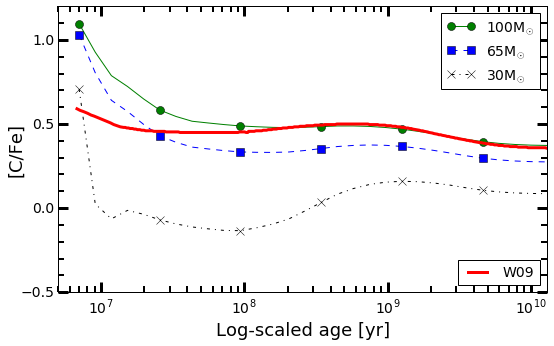

In [11]:
fign = fign + 1
plt.close(fign)
yaxis='[C/Fe]'
markevery=5
s0.plot_spectro(fig=fign,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='-',marker='o', \
                color='g',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn',fsize=[10,6])

s1_imf.plot_spectro(fig=fign,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='--',marker='s', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn',fsize=[10,6])
s2_imf.plot_spectro(fig=fign,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='-.',marker='x', \
                color='k',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn',fsize=[10,6],rspace=0.6)
ax=plt.gca()
ax.set_ylabel('[C/Fe]',labelpad=-5.,size=18)
ax.minorticks_on()
l2=ax.lines[-4:]
leg=ax.legend(l2,(str(s0.imf_yields_range[1])+'M$_{\odot}$''',str(s1_imf.imf_yields_range[1])+'M$_{\odot}$',
              str(s2_imf.imf_yields_range[1])+'M$_{\odot}$')
        ,loc=1,fontsize=14)
       
[x,y]=getW(fig=3,specie='[C/Fe]',source='all',Z=0.02)
l1,=ax.plot(x,y,color='r',linewidth=3,label='W09')
ax.add_artist(leg)
plt.legend(handles=[l1],loc=4,fontsize=14)

ax.set_ylim(-0.2,1.2)
ax=plt.gca();ax.minorticks_on()
plt.yticks(np.arange(-0.5, 1.5, 0.5))
fig=plt.gcf()       
plt.xlabel('Log-scaled age [yr]',size=18)
plt.xlim(5e6,13e9)
fig=plt.gcf()
fig=plt.gcf();fig.set_size_inches(8,5,forward=True)
plt.tight_layout()
fig.savefig('upper_imf_comparison.png', dpi=100) #save fgure

In [12]:
s0n=s.sygma(iolevel=0,iniZ=0.02,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=[1,30],
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp='lin',
           netyields_on=False,
            wiersmamod=False,
           table='yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt',
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table='yield_tables/iniabu/iniab2.0E-02GN93.ppn')

s0w=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=[1,30],
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table='yield_tables/iniabu/iniab2.0E-02GN93.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 2.56s
SYGMA run in progress..
   SYGMA run completed - Run time: 2.24s


## Fig. 14

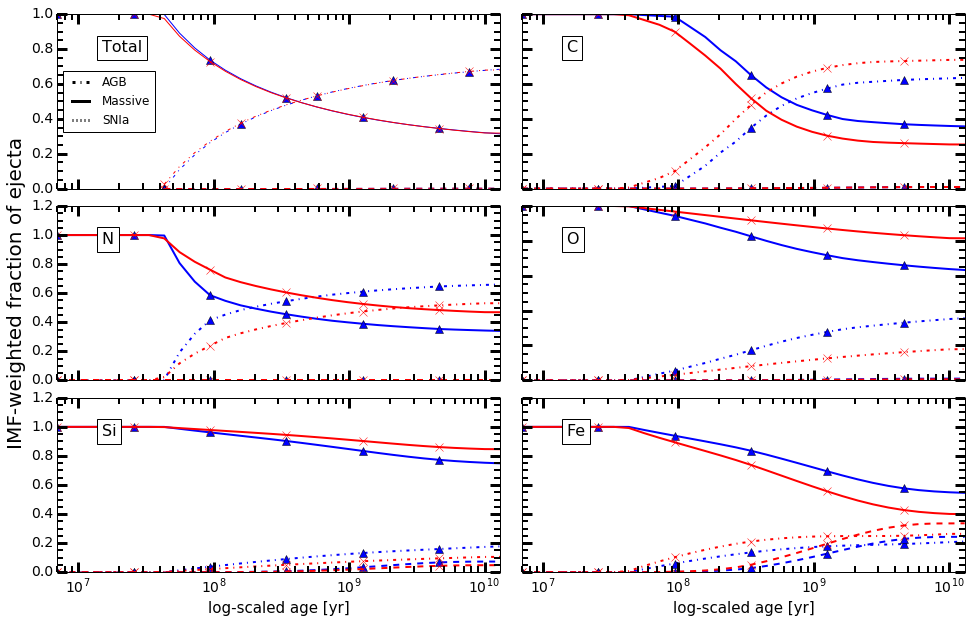

In [13]:
fign = fign + 1
markevery=5
props = dict(boxstyle='square', facecolor='w', alpha=1)
f, axarr = plt.subplots(3, 2,num=fign)
fig= f
elements=['Total','C','N','O','Si','Fe']
for specie in elements:
        specieW=specie
        if specie=='Total':
            plt.sca(axarr[0, 0])
        if specie=='C':
            plt.sca(axarr[0, 1])
        elif specie=='N':
            plt.sca(axarr[1, 0])
        elif specie=='O':
            plt.sca(axarr[1, 1])
        elif specie=='Si':
            plt.sca(axarr[2, 0])
        elif specie=='Fe':
            plt.sca(axarr[2, 1])
        if not 'G-1' in elements and specie=='Total':
            specieW='tot'
            s0n.plot_totmasses(fig=fign,source='agb',norm='current',color='b',
                  label='AGB, Z=1e-4',shape='-.',marker='^',log=False,markevery=markevery)
            s0n.plot_totmasses(fig=fign,source='massive',norm='current',color='b',
                  label='Massive, Z=1e-4',shape='-',marker='^',log=False,markevery=markevery)
            s0n.plot_totmasses(fig=fign,source='sn1a',norm='current',color='b',
                  label='SN1a, Z=1e-4',shape='--',marker='^',log=False,markevery=markevery)   
            s0w.plot_totmasses(fig=fign,source='agb',norm='current',color='r',
                  label='AGB, Z=1e-4',shape='-.',marker='x',log=False,markevery=markevery)
            s0w.plot_totmasses(fig=fign,source='massive',norm='current',color='r',
                  label='Massive, Z=1e-4',shape='-',marker='x',log=False,markevery=markevery)
            s0w.plot_totmasses(fig=fign,source='sn1a',norm='current',color='r',
                  label='SN1a, Z=1e-4',shape='--',marker='x',log=False,markevery=markevery)   

        else:
            if specie=='G-1':
                 specieW='tot'
            s0n.plot_mass(fig=fign,specie=specie,source='agb',norm='current',color='b',
                     label=specie+' (AGB), Z=2e-2',shape='-.',marker='^',markevery=markevery)
            s0n.plot_mass(fig=fign,specie=specie,source='massive',norm='current',color='b',
                     label=specie+' (massive), Z=2e-2',shape='-',marker='^',markevery=markevery)
            s0n.plot_mass(fig=fign,specie=specie,source='sn1a',norm='current',color='b',
                     label=specie+' (SN1a), Z=2e-2',shape='--',marker='^',markevery=markevery)
            s0w.plot_mass(fig=fign,specie=specie,source='agb',norm='current',color='r',
                     label=specie+' (AGB), Z=2e-2',shape='-.',marker='x',markevery=markevery)
            s0w.plot_mass(fig=fign,specie=specie,source='massive',norm='current',color='r',
                     label=specie+' (massive), Z=2e-2',shape='-',marker='x',markevery=markevery)
            s0w.plot_mass(fig=fign,specie=specie,source='sn1a',norm='current',color='r',
                     label=specie+' (SN1a), Z=2e-2',shape='--',marker='x',markevery=markevery)

        ax=plt.gca()
        ax.text(0.1, 0.85, specie, transform=ax.transAxes, fontsize=16,verticalalignment='top', bbox=props)                
        ax.minorticks_on()
        plt.title('')
        plt.legend().set_visible(False)
        if (specie=='N'):
            ax.set_ylabel('IMF-weighted fraction of ejecta',size=20)
        elif not ( ((specie=='Total') or ( specie=='N')) or ( specie=='Si')):
            ax.get_yaxis().set_ticklabels([]) #set_visible(False)
            plt.ylabel('')
        else:
            plt.ylabel('')
        if specie=='Total':
            plt.plot([],[],marker='',linestyle='-.',color='k',label='AGB',linewidth=3)
            plt.plot([],[],marker='',linestyle='-',color='k',label='Massive',linewidth=3)
            plt.plot([],[],marker='',linestyle=':',color='k',label='SNIa',linewidth=3)            
            l2=ax.lines[-3:]
            plt.legend(l2,('AGB','Massive','SNIa'),loc=6,prop={'size': 12}).set_visible(True) 
        if specie in ['Total','C','N','O']:
            ax.get_xaxis().set_ticklabels([])
            plt.xlabel('')
#general settings
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.05,left=0.05,right=0.95)
fig.set_size_inches(14,10,forward=True)
fig.savefig('wiersma_fig2_style_yield_comparison.png', dpi=100) #save fgure